<h2><span style="text-decoration: underline; color: #000080;">Machine learning:</span></h2>
<ul>
<li><span style="color: #000080;">Linear regression</span></li>
</ul>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter
%matplotlib inline

import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

pd.options.mode.chained_assignment = None

In [121]:
df = pd.read_csv("final_data_after_handling.csv")
df

,Unnamed: 0,Player,Season,Age,Position,Squad,Country,Comp,Lg_Rank,Matches,...,penalty_kicks_attempted_Cups,yellow_cards_Cups,red_cards_Cups,goals_per_game_Cups,assists_per_game_Cups,Ballon_D'or_Rank,Ballon_D'or_Percentage_Of_Votes,Start_Season,End_Season,Top_3
0,0,Lionel Messi,2005-2006,18,FW,Barcelona,es ESP,1. La Liga,1,17.0,...,0.0,0.0,0.0,0.28,0.28,0,0.00,2005,2006,0
1,1,Lionel Messi,2006-2007,19,FW,Barcelona,es ESP,1. La Liga,2,26.0,...,0.0,1.0,0.0,0.23,0.00,3,17.67,2006,2007,1
2,2,Lionel Messi,2007-2008,20,FW,Barcelona,es ESP,1. La Liga,3,27.0,...,1.0,2.0,0.0,0.74,0.25,2,19.54,2007,2008,1
3,3,Lionel Messi,2008-2009,21,FW,Barcelona,es ESP,1. La Liga,1,31.0,...,0.0,1.0,0.0,0.87,0.49,1,32.85,2008,2009,1
4,4,Lionel Messi,2009-2010,22,FW,Barcelona,es ESP,1. La Liga,1,35.0,...,0.0,0.0,0.0,0.73,0.00,1,22.65,2009,2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1299,Asamoah Gyan,2005-2006,19,FW,Modena,it ITA,2. Serie B,5,25.0,...,0.0,0.0,0.0,0.00,0.00,0,0.00,2005,2006,0
1300,1300,Asamoah Gyan,2006-2007,20,FW,Udinese,it ITA,1. Serie A,10,25.0,...,0.0,0.0,0.0,0.00,0.00,0,0.00,2006,2007,0
1301,1301,Asamoah Gyan,2008-2009,22,FW,Rennes,fr FRA,1. Ligue 1,7,16.0,...,0.0,0.0,0.0,0.00,0.00,0,0.00,2008,2009,0
1302,1302,Asamoah Gyan,2009-2010,23,FW,Rennes,fr FRA,1. Ligue 1,9,29.0,...,0.0,0.0,0.0,0.00,0.00,0,0.00,2009,2010,0


In [126]:
le = LabelEncoder()
x_copy = df.copy()
x_copy['Squad'] = le.fit_transform(x_copy['Squad'])   
x_copy['Player'] = le.fit_transform(x_copy['Player'])
x_copy['Comp'] = le.fit_transform(x_copy['Comp']) 
x_copy['Position'] = le.fit_transform(x_copy['Position'])
x_copy = x_copy.drop(["Player",'Top_3','Season','Unnamed: 0','Country','Comp_Cups',"Start_Season",'End_Season',"Ballon_D'or_Rank"], axis = 1)
x_copy

,Age,Position,Squad,Comp,Lg_Rank,Matches,Starts,Minutes,Goals,Assists,...,Minutes_Cups,Goals_Cups,Assists_Cups,penalty_kicks_made_Cups,penalty_kicks_attempted_Cups,yellow_cards_Cups,red_cards_Cups,goals_per_game_Cups,assists_per_game_Cups,Ballon_D'or_Percentage_Of_Votes
0,18,1,9,6,1,17.0,11,911.0,6.0,3.0,...,322.0,1.0,1.0,0.0,0.0,0.0,0.0,0.28,0.28,0.00
1,19,1,9,6,2,26.0,23,1983.0,14.0,3.0,...,385.0,1.0,0.0,0.0,0.0,1.0,0.0,0.23,0.00,17.67
2,20,1,9,6,3,27.0,23,1973.0,10.0,12.0,...,728.0,6.0,2.0,1.0,1.0,2.0,0.0,0.74,0.25,19.54
3,21,1,9,6,1,31.0,27,2516.0,23.0,11.0,...,927.0,9.0,5.0,0.0,0.0,1.0,0.0,0.87,0.49,32.85
4,22,1,9,6,1,35.0,30,2805.0,34.0,9.0,...,987.0,8.0,0.0,0.0,0.0,0.0,0.0,0.73,0.00,22.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,19,1,70,26,5,25.0,11,1275.0,8.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
1300,20,1,114,15,10,25.0,18,1556.0,8.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
1301,22,1,94,8,7,16.0,6,619.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
1302,23,1,94,8,9,29.0,27,2079.0,13.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00


In [131]:
def linear_regression(x_copy):
    target_column = "Ballon_D'or_Percentage_Of_Votes"
    TRAINING_FEATURES = x_copy.columns[x_copy.columns != target_column]
    TARGET_FEATURE = target_column

    X = x_copy[TRAINING_FEATURES]
    y = x_copy[TARGET_FEATURE]
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state= 1)
    regressor = LinearRegression()
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)
    evaluate_value = r2_score(y_test,y_pred)
    
    return evaluate_value

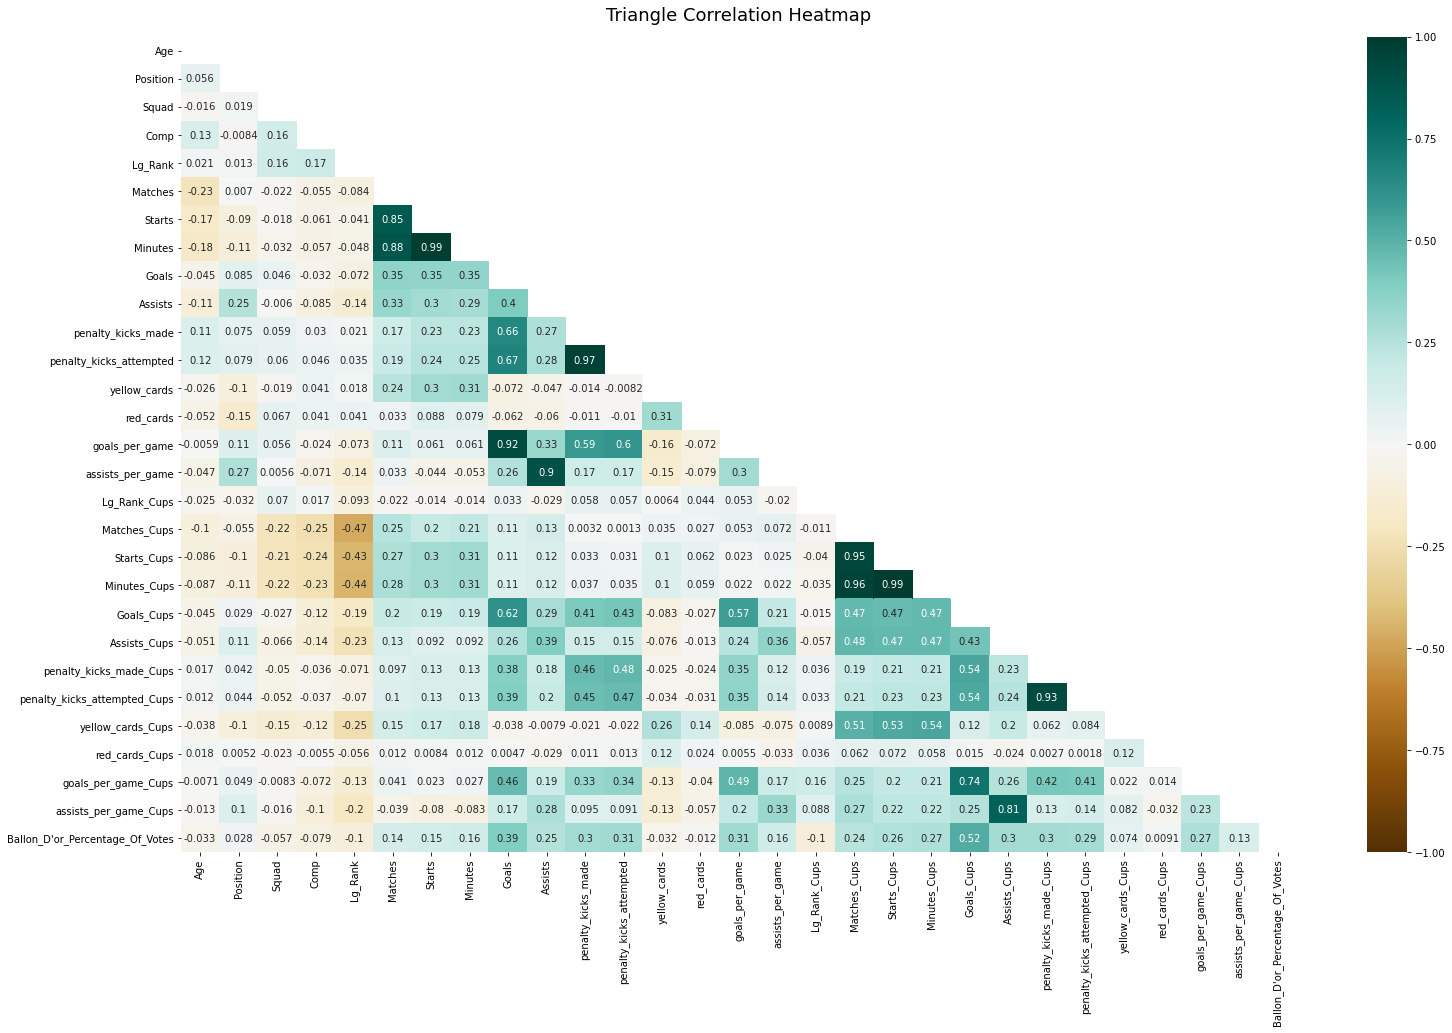

In [132]:
# הדפסת טבלת חום לפי קורולציה של המשתנים הנומריים
plt.figure(figsize=(25, 15))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(x_copy.corr(), dtype=np.bool))
heatmap = sns.heatmap(x_copy.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [133]:
linear_regression(x_copy)

0.40062810295609086

In [134]:
processed_X = x_copy.copy()
processed_X['matches*lg_rank'] = processed_X['Matches'] * processed_X['Lg_Rank']
processed_X['Minutes_Cups/Matches_cups'] = processed_X['Minutes_Cups'] * processed_X['Matches_Cups']
processed_X['Goals*Goals_Cups'] = processed_X['Goals'] * processed_X['Goals_Cups']
processed_X['Goals*Lg_Rank'] = processed_X['Goals'] * processed_X['Lg_Rank']
processed_X['Goals_Cups*Lg_Rank_Cups'] = processed_X['Goals_Cups'] * processed_X['Lg_Rank_Cups']
print(linear_regression(processed_X))

0.6017129147865492
